# **Web Scrapping** (Aplicación)

## ****Importando Paquetes****

In [2]:
#Otros paquetes
import os
import re
import lxml

#Paquete Pandas
import pandas as pd

#Paquete time
import time

#Paquete matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

#Paquete numpy
import numpy as np

#Paquete Selenium
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from time import sleep

## ****Descripción del Ejercicio****

### Se va a extraer datos del BCRP de las siguientes variables:

***-Consumo Privado***

***-Inversión Bruta Interna***

***-Exportaciones***

***-Importaciones***

## Consumo Privado

### Programando el Selenium

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--disable-notifications')
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), options=options)

### Entrando a la página

In [4]:
driver.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/")

sleep(2) #Tiempo de espera

### Haciendo click en PBI Gasto

In [5]:
driver.find_element(By.XPATH, "/html/body/div[3]/div/table/tbody/tr/td[2]/a[26]/u").click()

sleep(2)

### Cambiando a series anuales

In [6]:
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/ul/li[2]/a").click()

sleep(2)

### Precios constantes del 2007

In [7]:
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[2]/h2/a").click()

sleep(2)

### Escogiendo consumo privado

In [8]:
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[2]/div/table/tbody/tr[3]/td[3]/a").click()

sleep(2)

### Elegir el periodo 1990 - 2021

In [9]:
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[1]/div[1]/div[1]/div[1]/div[2]/select").click()

driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[1]/div[1]/div[1]/div[1]/div[2]/select").send_keys("1990")

sleep(1)

driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[1]/div[1]/div[2]/p/input[1]").click()

sleep(1)

### Extraer tabla:

In [10]:
tabla_prueba_consumo = driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[3]/table")

tabla_prueba_consumo

sleep(2)

In [11]:
tabla_intermedia_consumo = pd.read_html(tabla_prueba_consumo.get_attribute('outerHTML'), decimal=',')[0]

tabla_intermedia_consumo

sleep(2)

### Transformando a DataFrame

In [12]:
tabla_consumo = pd.DataFrame(tabla_intermedia_consumo)
tabla_consumo

,Fecha,Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Consumo Privado
0,1990,105735
1,1991,109665
2,1992,108852
3,1993,113680
4,1994,124433
5,1995,136275
6,1996,139501
7,1997,144555
8,1998,141698
9,1999,139666


### Cerrar el Navegador

In [13]:
driver.close()

## Inversión Bruta Interna

In [22]:
### Programando el Selenium
options = webdriver.ChromeOptions()
options.add_argument('--disable-notifications')
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), options=options)
### Entrando a la página
driver.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/")

sleep(2) #Tiempo de espera
### Haciendo click en PBI Gasto
driver.find_element(By.XPATH, "/html/body/div[3]/div/table/tbody/tr/td[2]/a[26]/u").click()

sleep(2)
### Cambiando a series anuales
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/ul/li[2]/a").click()

sleep(2)
### Precios constantes del 2007
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[2]/h2/a").click()

sleep(2)
### Escogiendo inversión bruta interna
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[2]/div/table/tbody/tr[5]/td[3]/a").click()

sleep(2)
### Elegir el periodo 1990 - 2021
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[1]/div[1]/div[1]/div[1]/div[2]/select").click()

driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[1]/div[1]/div[1]/div[1]/div[2]/select").send_keys("1990")

sleep(1)

driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[1]/div[1]/div[2]/p/input[1]").click()

sleep(1)
### Extraer tabla:
tabla_prueba_inversion = driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[3]/table")

tabla_prueba_inversion

sleep(2)
tabla_intermedia_inversion = pd.read_html(tabla_prueba_inversion.get_attribute('outerHTML'), decimal=',')[0]

tabla_intermedia_inversion

sleep(2)
### Transformando a DataFrame
tabla_inversion = pd.DataFrame(tabla_intermedia_inversion)
tabla_inversion
### Cerrar el Navegador
driver.close()

## Expotaciones

In [25]:
### Programando el Selenium
options = webdriver.ChromeOptions()
options.add_argument('--disable-notifications')
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), options=options)
### Entrando a la página
driver.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/")

sleep(2) #Tiempo de espera
### Haciendo click en PBI Gasto
driver.find_element(By.XPATH, "/html/body/div[3]/div/table/tbody/tr/td[2]/a[26]/u").click()

sleep(2)
### Cambiando a series anuales
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/ul/li[2]/a").click()

sleep(2)
### Precios constantes del 2007
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[2]/h2/a").click()

sleep(2)
### Escogiendo exportaciones
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[2]/div/table/tbody/tr[10]/td[3]/a").click()

sleep(2)
### Elegir el periodo 1990 - 2021
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[1]/div[1]/div[1]/div[1]/div[2]/select").click()

driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[1]/div[1]/div[1]/div[1]/div[2]/select").send_keys("1990")

sleep(1)

driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[1]/div[1]/div[2]/p/input[1]").click()

sleep(1)
### Extraer tabla:
tabla_prueba_exportaciones = driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[3]/table")

tabla_prueba_exportaciones

sleep(2)
tabla_intermedia_exportaciones = pd.read_html(tabla_prueba_exportaciones.get_attribute('outerHTML'), decimal=',')[0]

tabla_intermedia_exportaciones

sleep(2)
### Transformando a DataFrame
tabla_exportaciones = pd.DataFrame(tabla_intermedia_exportaciones)
tabla_exportaciones
### Cerrar el Navegador
driver.close()

## Importaciones

In [27]:
### Programando el Selenium
options = webdriver.ChromeOptions()
options.add_argument('--disable-notifications')
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()), options=options)
### Entrando a la página
driver.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/")

sleep(2) #Tiempo de espera
### Haciendo click en PBI Gasto
driver.find_element(By.XPATH, "/html/body/div[3]/div/table/tbody/tr/td[2]/a[26]/u").click()

sleep(2)
### Cambiando a series anuales
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/ul/li[2]/a").click()

sleep(2)
### Precios constantes del 2007
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[2]/h2/a").click()

sleep(2)
### Escogiendo importaciones
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[2]/div/table/tbody/tr[11]/td[3]/a").click()

sleep(2)
### Elegir el periodo 1990 - 2021
driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[1]/div[1]/div[1]/div[1]/div[2]/select").click()

driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[1]/div[1]/div[1]/div[1]/div[2]/select").send_keys("1990")

sleep(1)

driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[1]/div[1]/div[2]/p/input[1]").click()

sleep(1)
### Extraer tabla:
tabla_prueba_importaciones = driver.find_element(By.XPATH, "/html/body/div[3]/table/tbody/tr/td[2]/form/div[3]/table")

tabla_prueba_importaciones

sleep(2)
tabla_intermedia_importaciones = pd.read_html(tabla_prueba_importaciones.get_attribute('outerHTML'), decimal=',')[0]

tabla_intermedia_importaciones

sleep(2)
### Transformando a DataFrame
tabla_importaciones = pd.DataFrame(tabla_intermedia_importaciones)
tabla_importaciones
### Cerrar el Navegador
driver.close()

## ****Graficando****

### Definiendo Variables


In [31]:
years = tabla_consumo.iloc[:, 0]
consumo = tabla_consumo.iloc[:, 1]
inversion = tabla_inversion.iloc[:, 1]
importaciones = tabla_importaciones.iloc[:, 1]
exportaciones = tabla_exportaciones.iloc[:, 1]

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(years, consumo)
plt.subplot(222)
plt.plot(years, inversion)
plt.subplot(223)
plt.plot(years, importaciones)
plt.subplot(224)
plt.plot(years, exportaciones)
plt.suptitle('Evolución de los componentes del PBI')
plt.show()

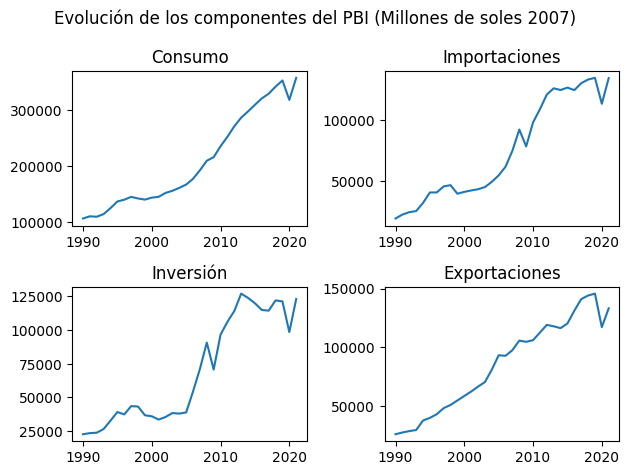

In [44]:
fig, axs = plt.subplots(2, 2)

# Consumo
axs[0, 0].plot(years, consumo)
axs[0, 0].set_title("Consumo")

# Inversion
axs[1, 0].plot(years, inversion)
axs[1, 0].set_title("Inversión")

# Importaciones
axs[0, 1].plot(years, importaciones)
axs[0, 1].set_title("Importaciones")

# Exportaciones
axs[1, 1].plot(years, exportaciones)
axs[1, 1].set_title("Exportaciones")

plt.suptitle('Evolución de los componentes del PBI (Millones de soles 2007)')
plt.tight_layout()
plt.show()
